The dataset is about Covid-19 activity in the World. This data is sourced from JHU CSSE COVID-19 Data as well as The New York Times. I find it on the Kaggle website. There are 12 colomns, But what I used is about 7 colomns 
Details of the meaning of the variables that I used are as follows:
PEOPLE_POSITIVE_CASES_COUNT : the cumulative number of population who are positive in a specific day
COUNTY_NAME: the name of county
PROVINCE_STATE_NAME: The name of province or state in that country
REPORT_DATE: The date of reported data 
CONTINENT_NAME: The Continents in the world( 5 countinent)
PEOPLE_POSITIVE_NEW_CASES_COUNT: The new cases count in that county
The goal of this project is to roughly explore the new cases of covid 19 in the world, sepcifically in the US. The dimensions of there graph are from County, State to Continent. Here are three type of graphes that I use: geom_col, geom_density and pie chart. 
Here are the procedures: 

In [ ]:
library(tidyverse)

In [2]:
covid <- read.csv("https://query.data.world/s/de5fgzhscdlp4bnzw2a3cysiazunc5", header=TRUE, stringsAsFactors=FALSE)
head(covid)

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,325,Otsego,New York,2020-09-19,America,New York Times,0,36077,USA,United States,US,1,4
2,10109,Otsego,New York,2022-04-17,America,New York Times,0,36077,USA,United States,US,15,88
3,5411,Otsego,New York,2021-12-01,America,New York Times,0,36077,USA,United States,US,41,63
4,3510,Otsego,New York,2021-08-02,America,New York Times,0,36077,USA,United States,US,2,47
5,2144,Otsego,New York,2021-02-12,America,New York Times,0,36077,USA,United States,US,12,39
6,2937,Otsego,New York,2021-04-01,America,New York Times,0,36077,USA,United States,US,26,46


In [3]:
covid1 = covid %>%
  select(COUNTY_NAME,PROVINCE_STATE_NAME, REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT)%>%
  drop_na()%>%
  filter(
    REPORT_DATE == '2020-06-20', 
    PROVINCE_STATE_NAME =='North Carolina')%>%
mutate(rk = rank(desc(PEOPLE_POSITIVE_NEW_CASES_COUNT)), ties.method = 'first') %>%
filter(rk <= 10) |>
mutate(COUNTY_NAME = fct_reorder(COUNTY_NAME, PEOPLE_POSITIVE_NEW_CASES_COUNT))

head(covid1)

,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT,rk,ties.method
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>
1,New Hanover,North Carolina,2020-06-20,46,5.0,first
2,Durham,North Carolina,2020-06-20,88,3.0,first
3,Wake,North Carolina,2020-06-20,254,2.0,first
4,Wayne,North Carolina,2020-06-20,35,9.0,first
5,Duplin,North Carolina,2020-06-20,38,6.5,first
6,Wilson,North Carolina,2020-06-20,38,6.5,first


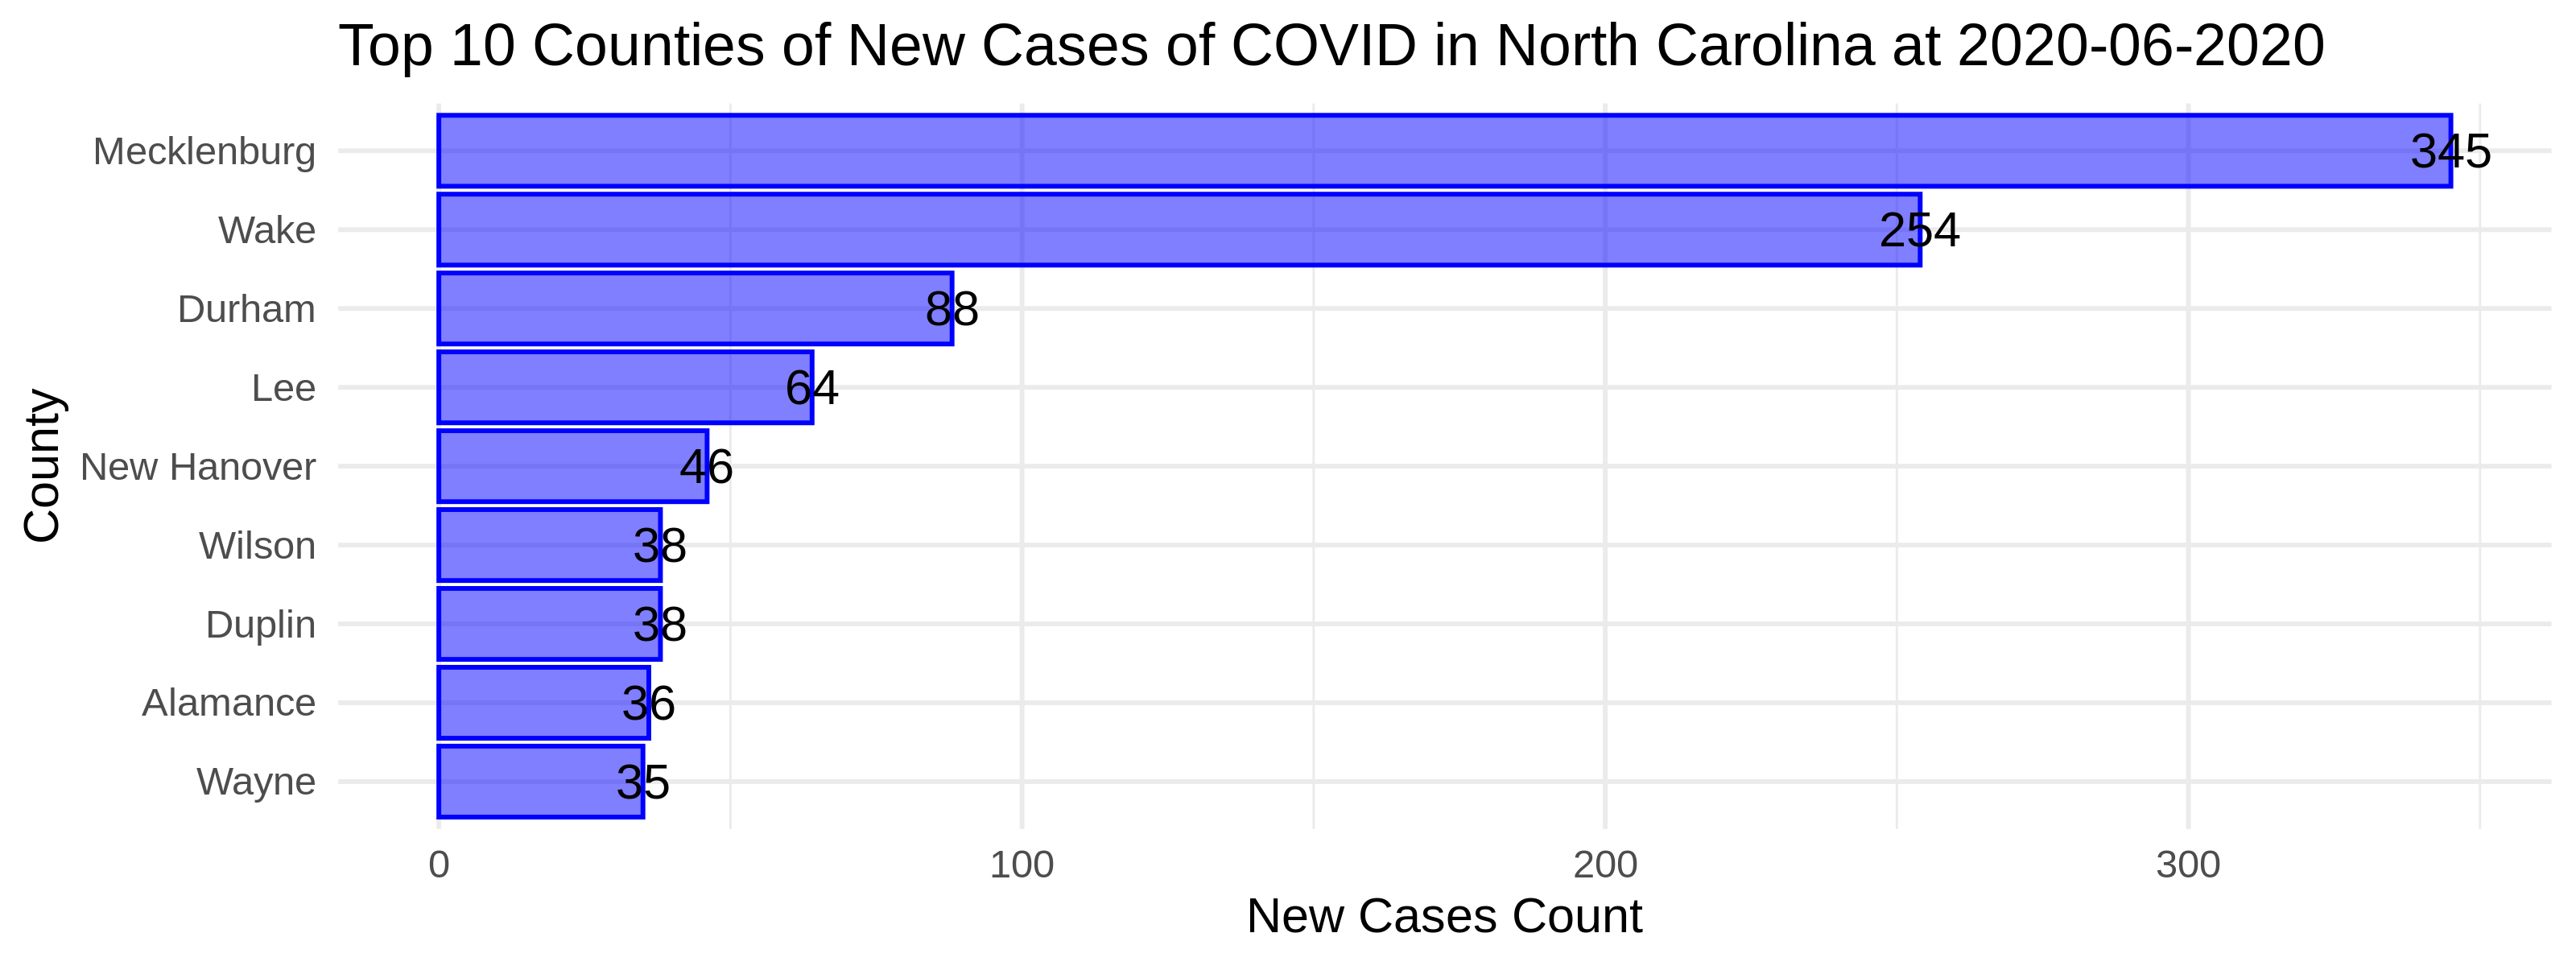

In [4]:
options(repr.plot.res = 400, repr.plot.height = 3, repr.plot.width = 8)
p = ggplot(covid1, aes( y= COUNTY_NAME, x = PEOPLE_POSITIVE_NEW_CASES_COUNT))
p = p + geom_col(na.rm = T, color = 'blue', fill = 'blue', alpha = 0.5)
p = p + geom_text(aes(label = PEOPLE_POSITIVE_NEW_CASES_COUNT), vjust = 0.5)
p = p + scale_color_brewer( palette = 'Set2')
p = p + theme_minimal()

p = p + labs(title = 'Top 10 Counties of New Cases of COVID in North Carolina at 2020-06-2020', x = 'New Cases Count' , y = 'County')
p

In [44]:
covid2 = covid %>%
  select(PROVINCE_STATE_NAME, REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT)%>%
  drop_na()%>%
filter(
    PROVINCE_STATE_NAME %in% c("United States", "West Virginia"),
    PEOPLE_POSITIVE_NEW_CASES_COUNT >= 1, PEOPLE_POSITIVE_NEW_CASES_COUNT <=100)

head(covid2)

covid3 = covid2 |>
  group_by(PROVINCE_STATE_NAME) |>
  summarize(mean_count = mean(PEOPLE_POSITIVE_NEW_CASES_COUNT))
head(covid3)

,PROVINCE_STATE_NAME,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
,<chr>,<chr>,<int>
1,North Carolina,2020-04-29,1
2,North Carolina,2020-06-05,1
3,North Carolina,2020-06-14,1
4,North Carolina,2020-06-20,3
5,North Carolina,2020-06-27,3
6,North Carolina,2020-06-28,1


PROVINCE_STATE_NAME,mean_count
<chr>,<dbl>
North Carolina,19.73349
West Virginia,13.78700


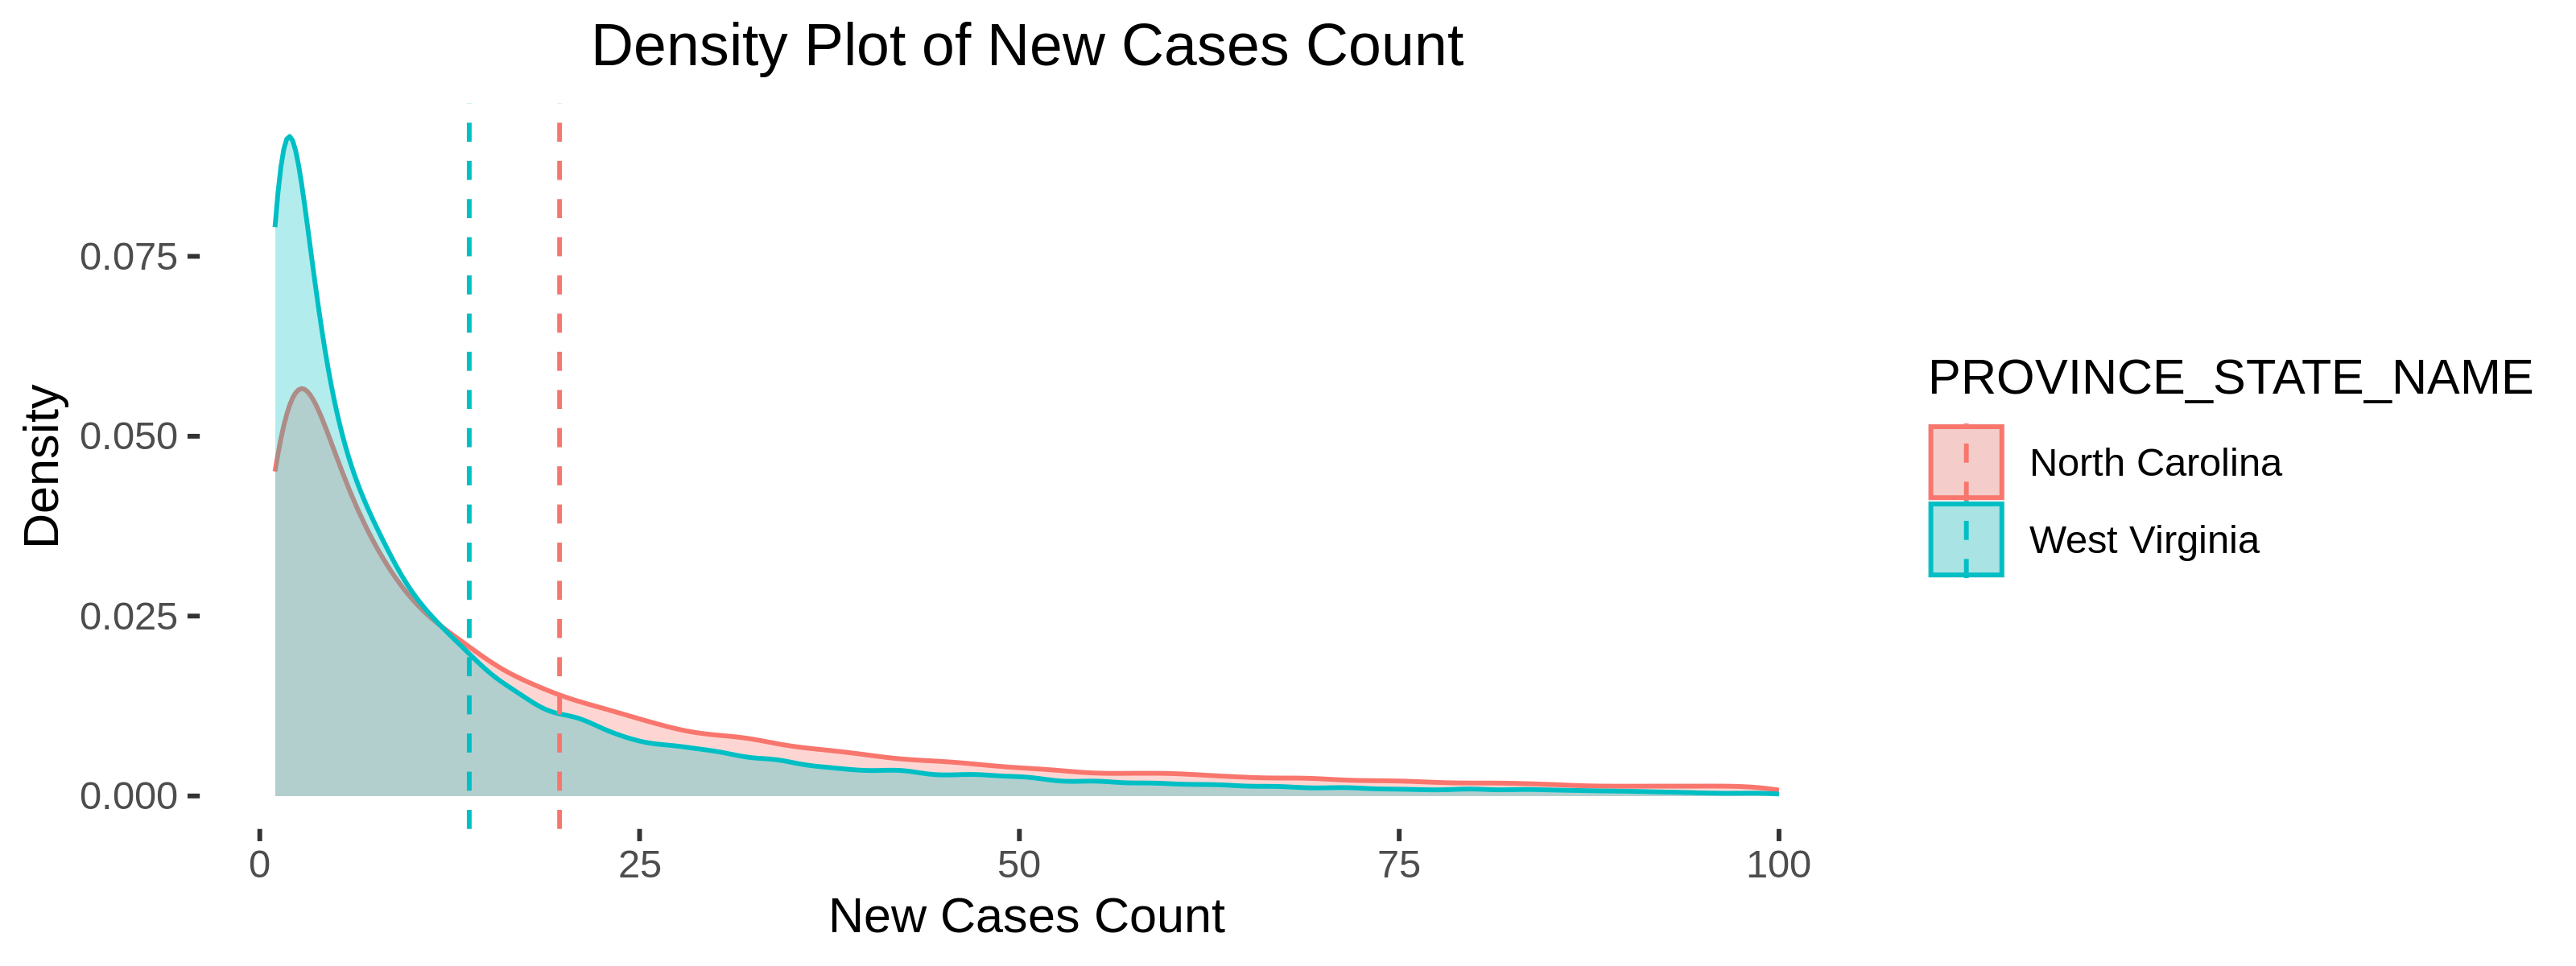

In [49]:
options(repr.plot.res = 400, repr.plot.height = 3, repr.plot.width = 8)
p = ggplot(covid2, aes(x = PEOPLE_POSITIVE_NEW_CASES_COUNT, color = PROVINCE_STATE_NAME, fill = PROVINCE_STATE_NAME))
p = p + geom_density(alpha = 0.3)
p = p + geom_vline(aes(xintercept = mean_count,color = PROVINCE_STATE_NAME),data = covid3, linetype ="dashed")
p = p + theme(
    panel.background = element_blank(),
    plot.title = element_text(hjust = 0.5))
p = p + labs(title = 'Density Plot of New Cases Count', x = 'New Cases Count' , y = 'Density')
p

In [107]:
covid4 = covid %>%
  select(REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,CONTINENT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT)%>%
  drop_na()%>%
filter(
    CONTINENT_NAME %in% c("Asia", "America","Europe","Africa","Oceania"),
    )
head(covid4)



covid5 = covid4 |>
  group_by(CONTINENT_NAME) |>
  filter(
      REPORT_DATE == '2020-06-20')|>
  summarize(
            sum_count_new = sum(PEOPLE_POSITIVE_NEW_CASES_COUNT)
            )
            

head(covid5)

,REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,CONTINENT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
,<chr>,<int>,<chr>,<int>
1,2020-09-19,325,America,1
2,2022-04-17,10109,America,15
3,2021-12-01,5411,America,41
4,2021-08-02,3510,America,2
5,2021-02-12,2144,America,12
6,2021-04-01,2937,America,26


CONTINENT_NAME,sum_count_new
<chr>,<int>
Africa,11360
America,118213
Asia,40752
Europe,15675
Oceania,52


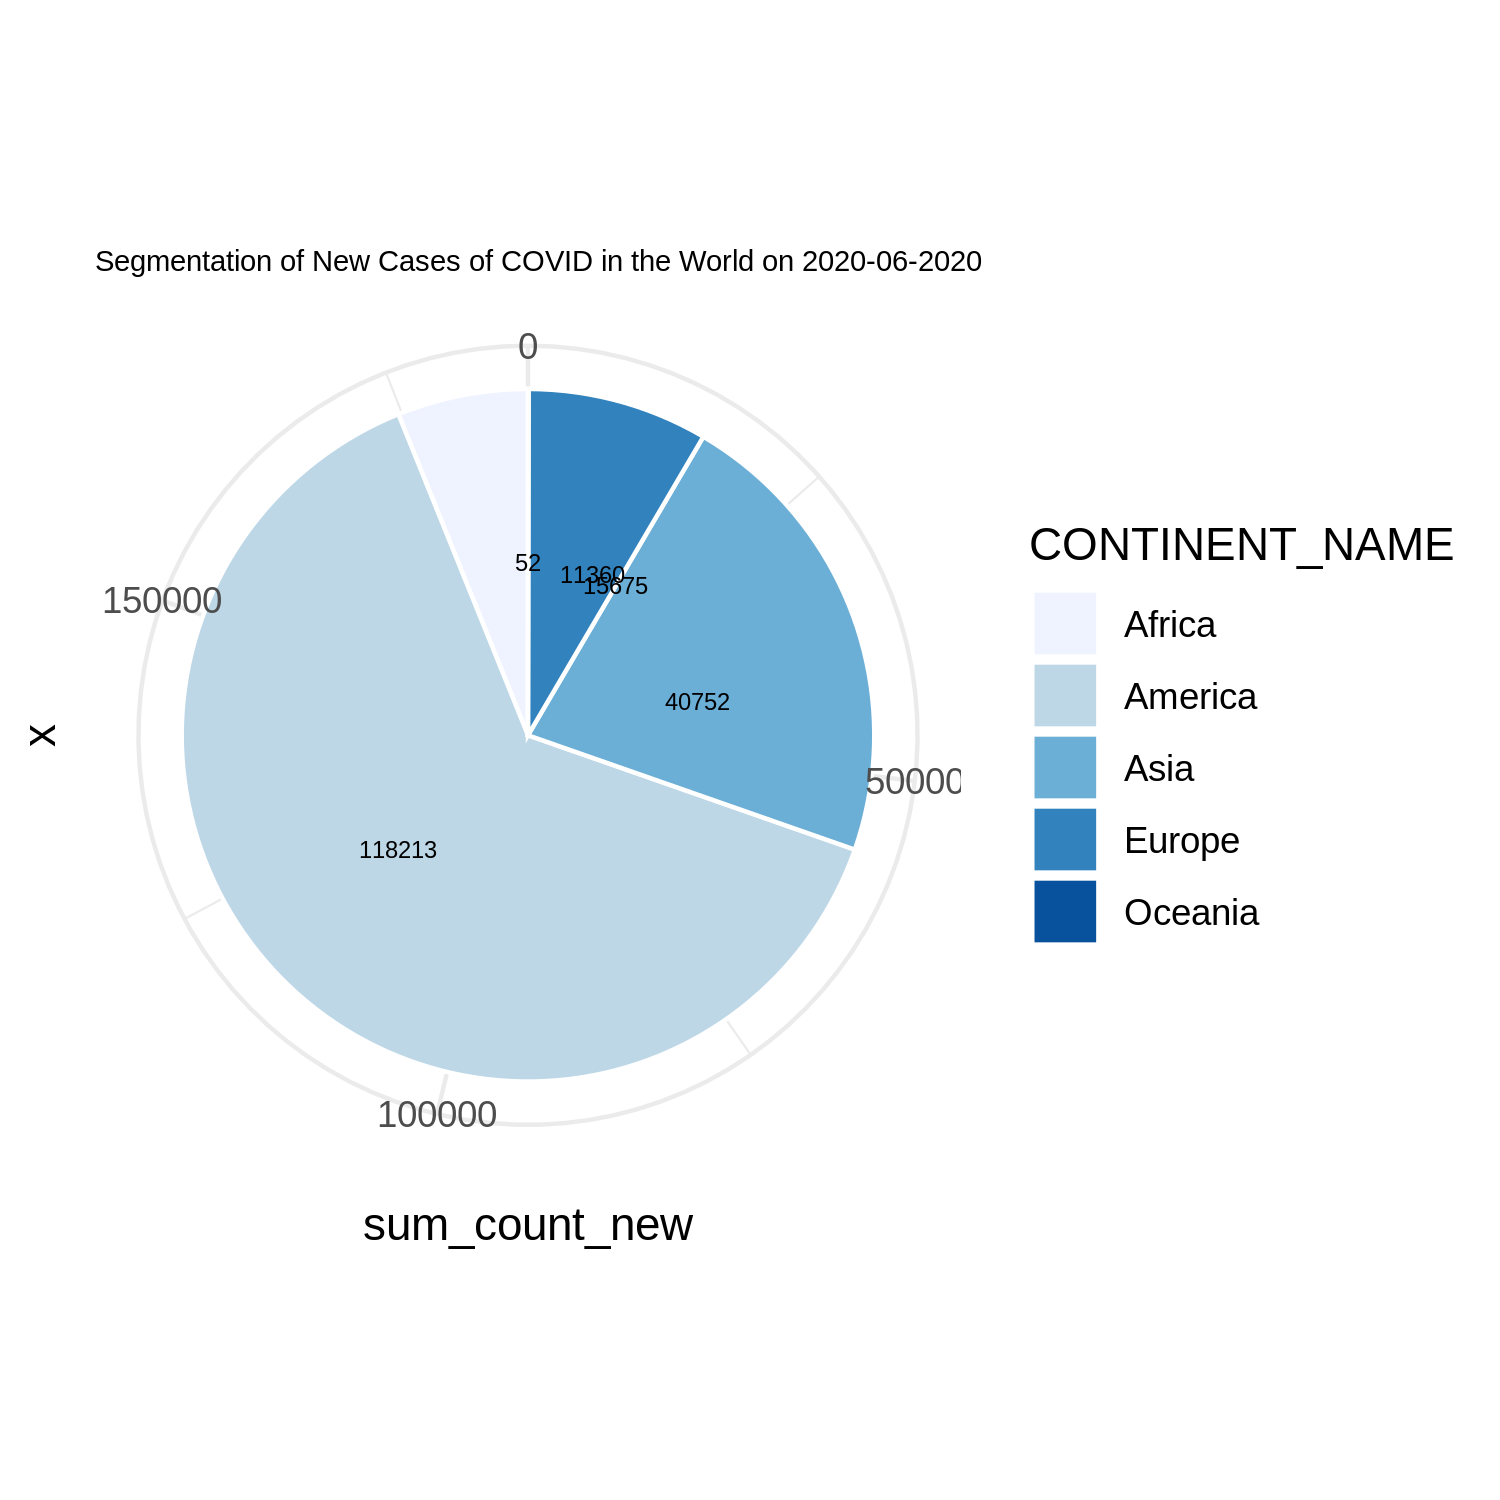

In [111]:
options(repr.plot.res = 300, repr.plot.height = 5, repr.plot.width = 5)
p = ggplot(covid5, aes( y= sum_count_new, x = "",fill=CONTINENT_NAME ))
p = p + geom_bar(stat="identity", width=1, color="white")
p = p + coord_polar("y", start=0)
p = p + geom_text(aes(label = sum_count_new), vjust = 0.5, size=2)
p = p + scale_fill_brewer(palette="Blues")
p = p + theme_minimal()
p = p + theme(
    plot.title = element_text(size = 7))
p = p + labs(title = 'Segmentation of New Cases of COVID in the World on 2020-06-2020')
p
